### Classifiers - Mini Project 2

Predictive Model : Adolescent Aloholism

As part of the consulting team:

- With various info on adolescents’ school and home environment, design and build a data-driven model to identify individuals with high-risk alcohol consumption.

### 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn import svm
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### 2. Dataset

Combined 2 Datasets : 1 Math Class & 1 Portuguese Class

Each Consists of 33 columns :-

1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93) 
31. G1 - first period grade (numeric: from 0 to 20)
32. G2 - second period grade (numeric: from 0 to 20)
33. G3 - final grade (numeric: from 0 to 20)

### 3. Reading the Data

In [2]:
data_mat = pd.read_csv('student-mat.csv')
data_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
data_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

### 4. Cleaning and Transforming the Data

#### - Label '0' for students from Maths class

In [4]:
data_mat['label'] = '0'

#### - Read and Label '1' for students from Portuguese class

In [5]:
data_por = pd.read_csv('student-por.csv')
data_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


#### - Merge two datasets

In [6]:
data_por['label'] = '1'
data = data_mat.append([data_mat,data_por])

In [7]:
data['Walc'].value_counts()

1    549
2    320
3    280
4    189
5    101
Name: Walc, dtype: int64

#### - Update Target Variable 'Walc' to Binary

In [8]:
data['Walc'] = [0 if i <= 2 else 1 for i in data['Walc']]
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,label
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,0,3,6,5,6,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,0,3,4,5,5,6,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,1,3,10,7,8,10,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,0,5,2,15,14,15,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,0,5,4,6,10,10,0


In [9]:
data['Walc'].value_counts()

0    869
1    570
Name: Walc, dtype: int64

#### - Update Feature Variable 'Dalc' to Binary

In [10]:
data['Dalc'] = [0 if i <= 2 else 1 for i in data['Dalc']]
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,label
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,0,0,3,6,5,6,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,0,0,3,4,5,5,6,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,0,1,3,10,7,8,10,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,0,0,5,2,15,14,15,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,0,0,5,4,6,10,10,0


In [11]:
data['Dalc'].value_counts()

0    1274
1     165
Name: Dalc, dtype: int64

### 5. Visualisations

In [12]:
def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn_r')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax

In [13]:
a = data.groupby(['age','Dalc']).size()
a1 = data.groupby(['age','Dalc']).size().unstack(fill_value=0)
a2 = a1.set_axis(['0','1'], axis=1, inplace=False)
a2.index.name = None
a_results = a2.T.to_dict('list')
a_category_names = a2.columns.to_list()

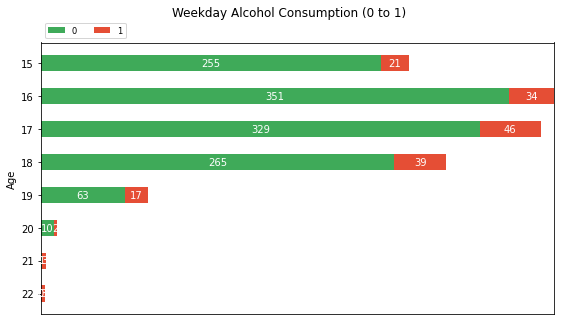

In [14]:
survey(a_results, a_category_names)
plt.suptitle("Weekday Alcohol Consumption (0 to 1)")
plt.ylabel("Age")
# plt.tight_layout()
# plt.savefig('Weekday.png',bbox_inches='tight',facecolor='white', transparent=False)
plt.show()

In [15]:
b = data.groupby(['age','Walc']).size()
b1 = data.groupby(['age','Walc']).size().unstack(fill_value=0)
b2 = b1.set_axis(['0','1'], axis=1, inplace=False)
b2.index.name = None
b_results = b2.T.to_dict('list')
b_category_names = b2.columns.to_list()

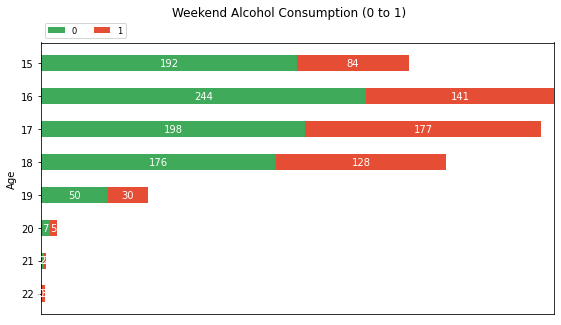

In [16]:
survey(b_results, b_category_names)
plt.suptitle("Weekend Alcohol Consumption (0 to 1)")
plt.ylabel("Age")
# plt.tight_layout()
# plt.savefig('Weekend.png',bbox_inches='tight',facecolor='white', transparent=False)
plt.show()

#### - Visualisation by Weekday Drinking

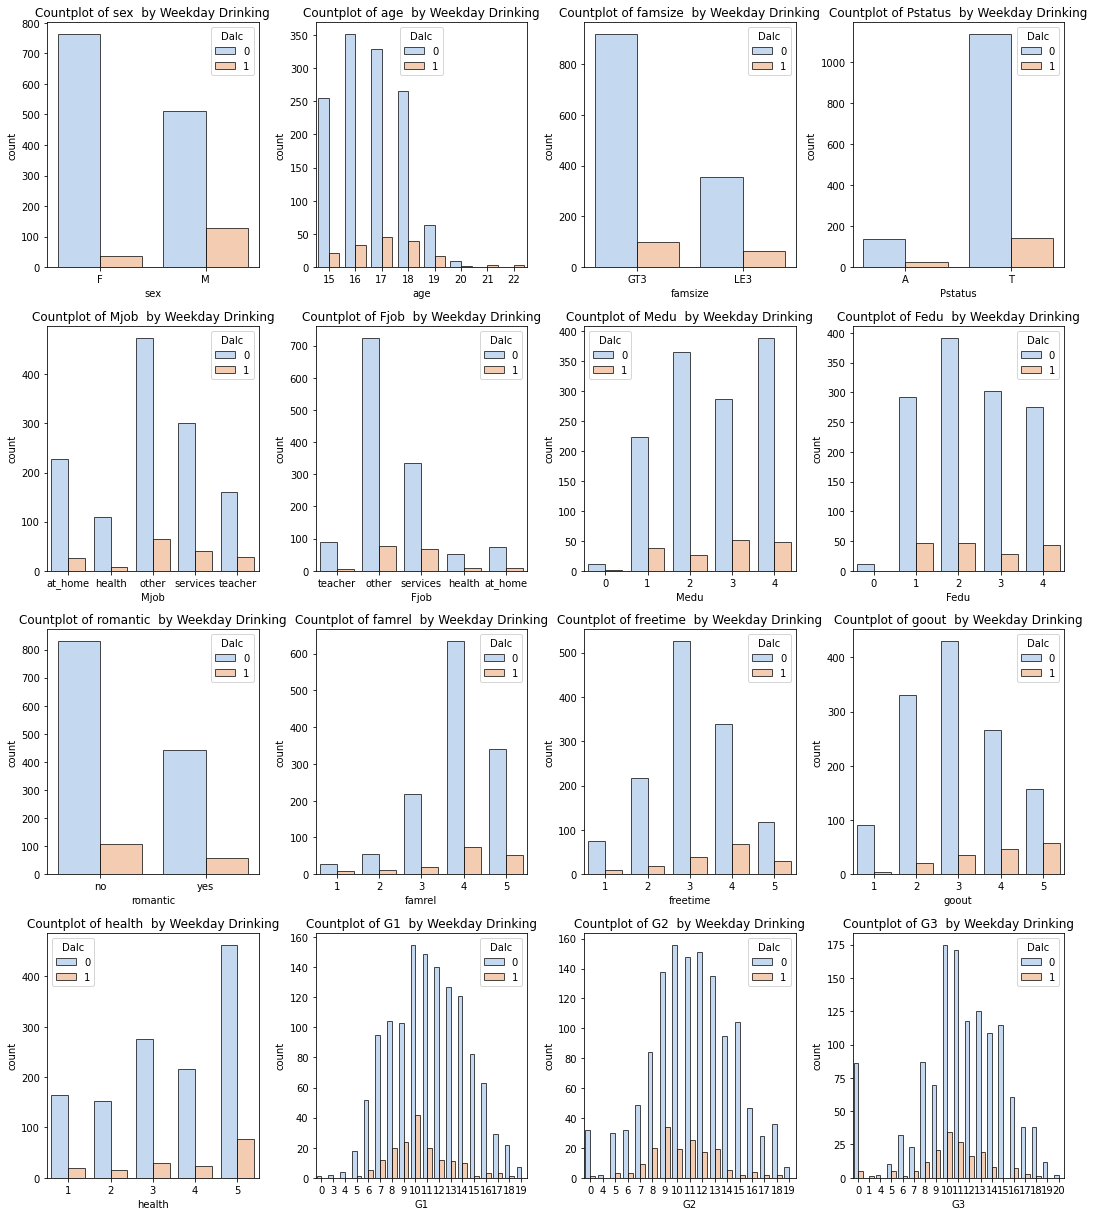

In [17]:
plt.figure(figsize=[15,17])
features=['sex','age','famsize','Pstatus','Mjob','Fjob','Medu','Fedu',
          'romantic','famrel','freetime','goout','health','G1','G2','G3']
n=1
for f in features:
    plt.subplot(4,4,n)
    sns.countplot(x=f, hue='Dalc', edgecolor="black", alpha=0.7, data=data,palette = 'pastel')
#     sns.despine()
    plt.title("Countplot of {}  by Weekday Drinking".format(f))
    n=n+1
plt.tight_layout()
plt.show()

#### - Visualisation by Weekend Drinking

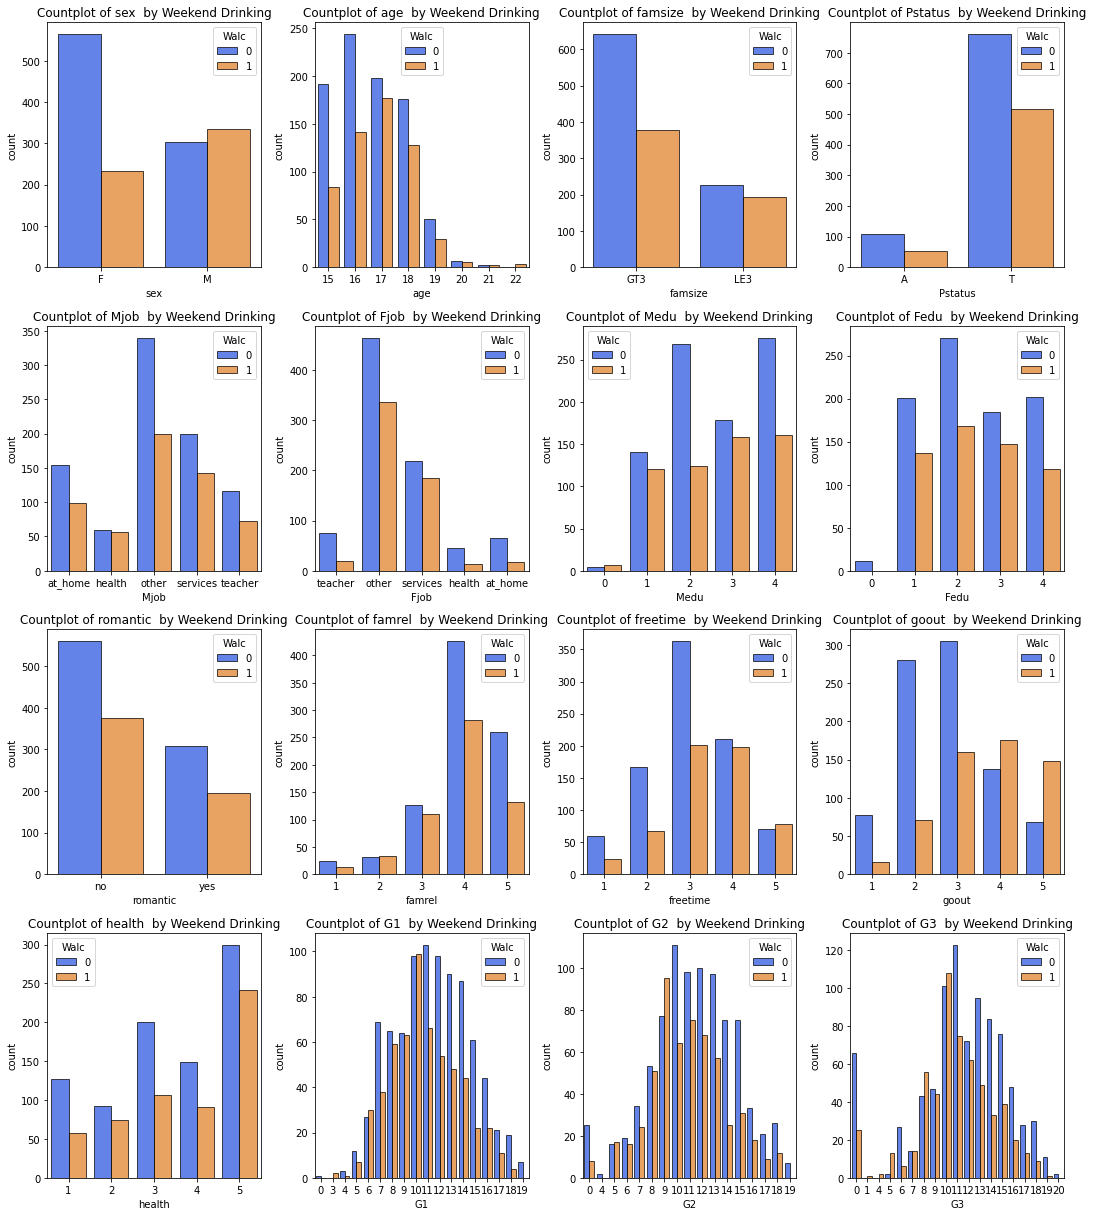

In [18]:
plt.figure(figsize=[15,17])
features=['sex','age','famsize','Pstatus','Mjob','Fjob','Medu','Fedu',
          'romantic','famrel','freetime','goout','health','G1','G2','G3']
n=1
for f in features:
    plt.subplot(4,4,n)
    sns.countplot(x=f, hue='Walc', edgecolor="black", alpha=0.7, data=data, palette = 'bright')
#     sns.despine()
    plt.title("Countplot of {}  by Weekend Drinking".format(f))
    n=n+1
plt.tight_layout()
plt.show()

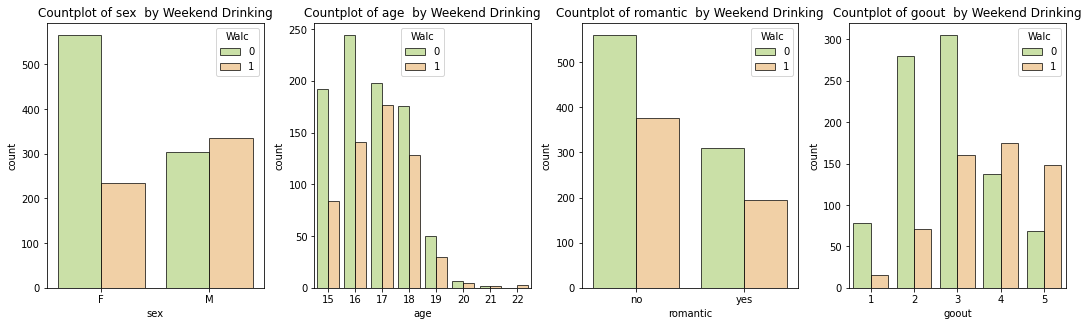

In [19]:
plt.figure(figsize=[15,17])
features=['sex','age','romantic','goout']
n=1
for f in features:
    plt.subplot(4,4,n)
    sns.countplot(x=f, hue='Walc', edgecolor="black", alpha=0.7, data=data, palette = 'RdYlGn_r')
#     sns.despine()
    plt.title("Countplot of {}  by Weekend Drinking".format(f))
    n=n+1
plt.tight_layout()
# plt.savefig('Weekend Countplot 1.png',bbox_inches='tight',facecolor='white', transparent=False)
plt.show()

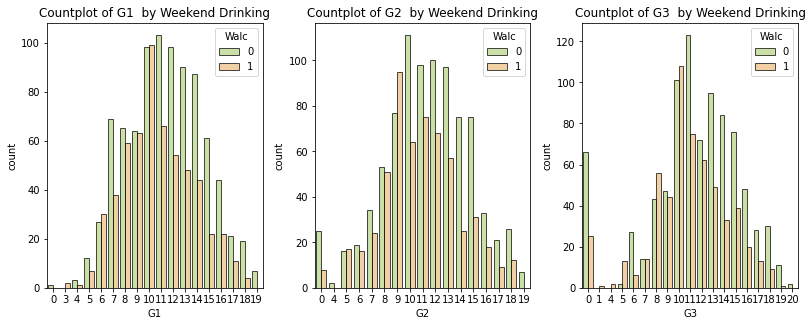

In [20]:
plt.figure(figsize=[15,17])
features=['G1','G2','G3']
n=1
for f in features:
    plt.subplot(4,4,n)
    sns.countplot(x=f, hue='Walc', edgecolor="black", alpha=0.7, data=data, palette = 'RdYlGn_r')
#     sns.despine()
    plt.title("Countplot of {}  by Weekend Drinking".format(f))
    n=n+1
plt.tight_layout()
# plt.savefig('Weekend Countplot Grade.png',bbox_inches='tight',facecolor='white', transparent=False)
plt.show()

#### - Correlation Matrix

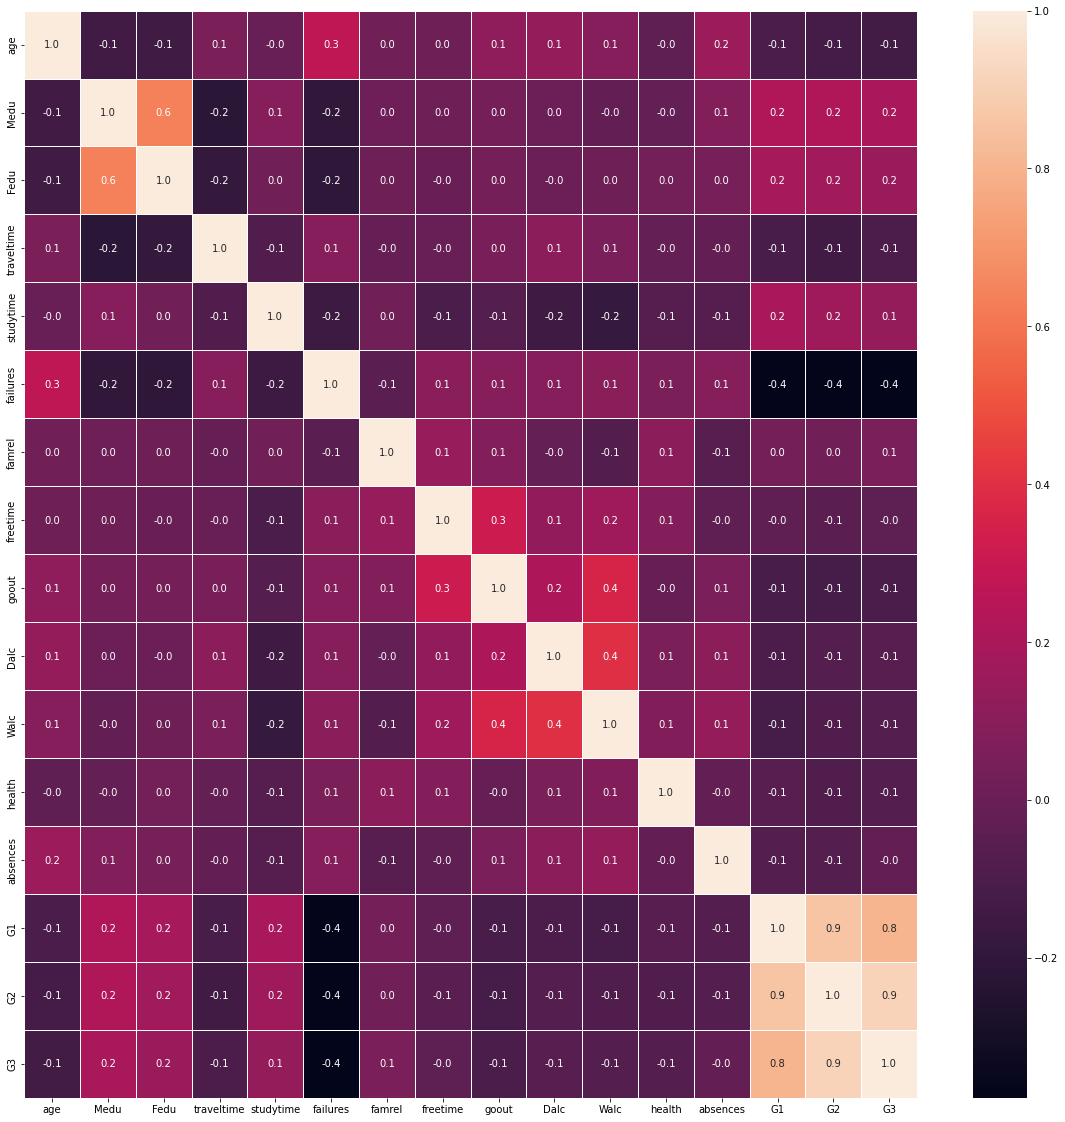

In [21]:
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,fmt=".1f",linewidths=1,ax=ax)
plt.show()

### 6. Label Encoder

In [22]:
le = preprocessing.LabelEncoder()

def LabelEncoder(data):
    for c in data.columns:
        if data.dtypes[c] == object:
            le.fit(data[c].astype(str))
            data[c] = le.transform(data[c].astype(str))
    return data

In [23]:
data = LabelEncoder(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1439 entries, 0 to 648
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      1439 non-null   int32
 1   sex         1439 non-null   int32
 2   age         1439 non-null   int64
 3   address     1439 non-null   int32
 4   famsize     1439 non-null   int32
 5   Pstatus     1439 non-null   int32
 6   Medu        1439 non-null   int64
 7   Fedu        1439 non-null   int64
 8   Mjob        1439 non-null   int32
 9   Fjob        1439 non-null   int32
 10  reason      1439 non-null   int32
 11  guardian    1439 non-null   int32
 12  traveltime  1439 non-null   int64
 13  studytime   1439 non-null   int64
 14  failures    1439 non-null   int64
 15  schoolsup   1439 non-null   int32
 16  famsup      1439 non-null   int32
 17  paid        1439 non-null   int32
 18  activities  1439 non-null   int32
 19  nursery     1439 non-null   int32
 20  higher      1439 non-null   int

In [24]:
# data.to_excel("output_combi.xlsx")  

### 7. Buiding Classifiers Models

#### - Set input and output variables

In [25]:
X = data.drop(['Walc'], axis = 1)
y = data['Walc'].values

#### - Train, Test Split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 100)

#### - Scaling and Principle Component Analysis

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

#### - Initialize GridSearchCV

In [28]:
model_params = {
    'SVM': {
        'model': svm.SVC(gamma='scale'),
        'params' : {
            'C': [1,10,20],
            'decision_function_shape' : ['ovr','ovo'],
            'kernel': ['rbf','linear','poly','sigmoid']
        }  
    },
    'SGDClassifier': {
        'model': SGDClassifier(loss='perceptron'),
        'params' : {
            'max_iter': [5000],
            'eta0' : [1],
            'learning_rate' : ['constant'],
            'penalty':['l2', 'l1', 'elasticnet', None]
        }  
    },
    'Random_Forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,11,12,13,14,15,20,30,50],
            'max_depth': [1,5,10,11,12,13,14,15]
        }
    },
    'Decision_Tree': {
        'model': DecisionTreeClassifier(),
        'params' : {
            'criterion': ['gini','entropy']
        }
    },
    'Logistic_Regression' : {
        'model': LogisticRegression(),
        'params': {
            'C': [1,5,6,8,10],
            'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'max_iter': [5000],
            'multi_class': ['auto', 'ovr']
        }
    },
    'Gaussian_NB' : {
        'model': GaussianNB(),
        'params': {
            'priors': [None]
        }
    },
    'Bernoulli_NB' : {
        'model': BernoulliNB(),
        'params': {
            'class_prior': [None]
        }
    },
    'K_Neighbours' : {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [1,2,3,4,5,10,15,20,25,30,35]
        }
    },
    'OvR' : {
        'model': OneVsRestClassifier(SVC()),
        'params': {
            'estimator': [SVC()]
        }
    }
}

### 8. Result of GridSearchCV - Best Score, Best Parameters

In [29]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_, #Mean cross-validated score of the best_estimator
        'best_params': clf.best_params_ #Parameter setting that gave the best results on the hold out data.
    })
    
score_df = pd.DataFrame(scores,columns=['model','best_score','best_params']).sort_values(by=['best_score'],ascending=False)
with pd.option_context('display.max_colwidth', None):
    display(score_df)

,model,best_score,best_params
0,SVM,0.883784,"{'C': 10, 'decision_function_shape': 'ovr', 'kernel': 'rbf'}"
7,K_Neighbours,0.849022,{'n_neighbors': 1}
2,Random_Forest,0.839136,"{'max_depth': 14, 'n_estimators': 50}"
8,OvR,0.819255,{'estimator': SVC()}
3,Decision_Tree,0.798409,{'criterion': 'entropy'}
4,Logistic_Regression,0.763603,"{'C': 1, 'max_iter': 5000, 'multi_class': 'auto', 'solver': 'newton-cg'}"
5,Gaussian_NB,0.739835,{'priors': None}
6,Bernoulli_NB,0.702034,{'class_prior': None}
1,SGDClassifier,0.682237,"{'eta0': 1, 'learning_rate': 'constant', 'max_iter': 5000, 'penalty': None}"


### 9. Classifiers

#### - No 1 : K-Nearest Neighbours

KNN Accuracy is:  0.9004629629629629
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       256
           1       0.87      0.89      0.88       176

    accuracy                           0.90       432
   macro avg       0.90      0.90      0.90       432
weighted avg       0.90      0.90      0.90       432



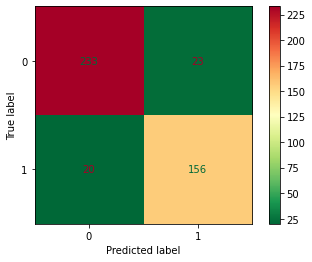

In [30]:
KNN_clf = KNeighborsClassifier(n_neighbors=1)

KNN_final_model = KNN_clf.fit(X_train, y_train)
KNN_final_pred = KNN_clf.predict(X_test)
KNN_final_accuracy = accuracy_score(y_test,KNN_final_pred)
print('KNN Accuracy is: ',KNN_final_accuracy)
KNN_final_cm = confusion_matrix(y_test, KNN_final_pred)

print(classification_report(y_test, KNN_final_pred))

KNN_disp = ConfusionMatrixDisplay(confusion_matrix=KNN_final_cm,display_labels=KNN_clf.classes_)
KNN_disp.plot(cmap='RdYlGn_r')
# plt.savefig('KNN CM.png',bbox_inches='tight',facecolor='white', transparent=False)
plt.show()

KNN_final_false_positive_rate, KNN_final_true_positive_rate, KNN_final_thresholds = roc_curve(y_test, KNN_final_pred)
KNN_final_roc_auc = auc(KNN_final_false_positive_rate, KNN_final_true_positive_rate)

#### - No 2 : Support Vector Machine

SVM Accuracy is:  0.8935185185185185
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       256
           1       0.91      0.82      0.86       176

    accuracy                           0.89       432
   macro avg       0.90      0.88      0.89       432
weighted avg       0.89      0.89      0.89       432



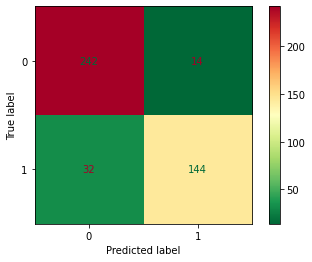

In [31]:
# StratifiedKFold is used if the estimator is a classifier and y is either binary or multiclass

SVM_clf = svm.SVC(gamma='auto',C=10,decision_function_shape ='ovr',kernel='rbf')

SVM_final_model = SVM_clf.fit(X_train, y_train)
SVM_final_pred = SVM_clf.predict(X_test)
SVM_final_accuracy = accuracy_score(y_test,SVM_final_pred)
print('SVM Accuracy is: ',SVM_final_accuracy)
SVM_final_cm = confusion_matrix(y_test, SVM_final_pred)

print(classification_report(y_test, SVM_final_pred))

SVM_disp = ConfusionMatrixDisplay(confusion_matrix=SVM_final_cm,display_labels=SVM_clf.classes_)
SVM_disp.plot(cmap='RdYlGn_r')
# plt.savefig('SVM CM.png',bbox_inches='tight',facecolor='white', transparent=False)
plt.show()

SVM_final_false_positive_rate, SVM_final_true_positive_rate, SVM_final_thresholds = roc_curve(y_test, SVM_final_pred)
SVM_final_roc_auc = auc(SVM_final_false_positive_rate, SVM_final_true_positive_rate)

#### - No 3 : One Vs Rest

OvR Accuracy is:  0.8240740740740741
              precision    recall  f1-score   support

           0       0.79      0.96      0.87       256
           1       0.91      0.63      0.74       176

    accuracy                           0.82       432
   macro avg       0.85      0.79      0.81       432
weighted avg       0.84      0.82      0.82       432



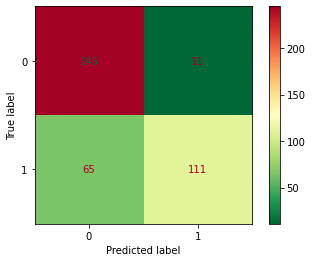

In [32]:
OvR_clf = OneVsRestClassifier(SVC())

OvR_final_model = OvR_clf.fit(X_train, y_train)
OvR_final_pred = OvR_clf.predict(X_test)
OvR_final_accuracy = accuracy_score(y_test,OvR_final_pred)
print('OvR Accuracy is: ',OvR_final_accuracy)
OvR_final_cm = confusion_matrix(y_test, OvR_final_pred)

print(classification_report(y_test, OvR_final_pred))

OvR_disp = ConfusionMatrixDisplay(confusion_matrix=OvR_final_cm,display_labels=OvR_clf.classes_)
OvR_disp.plot(cmap='RdYlGn_r')
# plt.savefig('OvR CM.png',bbox_inches='tight',facecolor='white', transparent=False)
plt.show()

OvR_final_false_positive_rate, OvR_final_true_positive_rate, OvR_final_thresholds = roc_curve(y_test, OvR_final_pred)
OvR_final_roc_auc = auc(OvR_final_false_positive_rate, OvR_final_true_positive_rate)

#### - No 4 : Random Forest (Ensemble)
#### A random forest is a meta estimator that fits a number of decision tree classifiers on various dataset sub-samples and uses averaging to improve the predictive accuracy and control over-fitting

RF Accuracy is:  0.8449074074074074
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       256
           1       0.92      0.68      0.78       176

    accuracy                           0.84       432
   macro avg       0.87      0.82      0.83       432
weighted avg       0.86      0.84      0.84       432



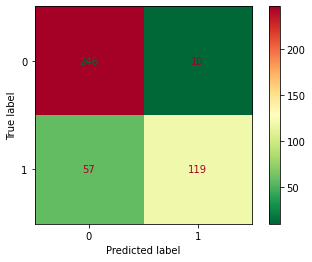

In [35]:
RF_clf = RandomForestClassifier(n_estimators=50, max_depth=11)

RF_final_model = RF_clf.fit(X_train, y_train)
RF_final_pred = RF_clf.predict(X_test)
RF_final_accuracy = accuracy_score(y_test,RF_final_pred)
print('RF Accuracy is: ',RF_final_accuracy)
RF_final_cm = confusion_matrix(y_test, RF_final_pred)

print(classification_report(y_test, RF_final_pred))

RF_disp = ConfusionMatrixDisplay(confusion_matrix=RF_final_cm,display_labels=RF_clf.classes_)
RF_disp.plot(cmap='RdYlGn_r')
plt.show()

RF_final_false_positive_rate, RF_final_true_positive_rate, RF_final_thresholds = roc_curve(y_test, RF_final_pred)
RF_final_roc_auc = auc(RF_final_false_positive_rate, RF_final_true_positive_rate)

### 10. ROC Curve

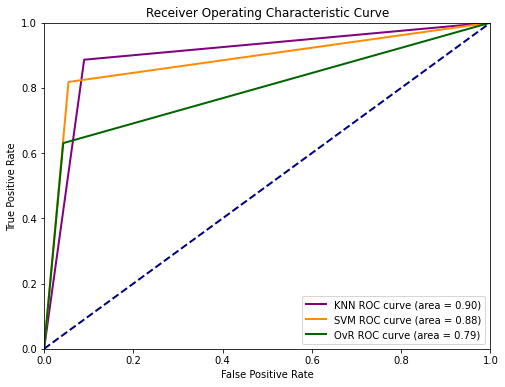

In [34]:
plt.figure(figsize=[8,6])
lw = 2

plt.plot(KNN_final_false_positive_rate, KNN_final_true_positive_rate, color='purple', lw = lw, label = 'KNN ROC curve (area = %0.2f)' % KNN_final_roc_auc)
plt.plot(SVM_final_false_positive_rate, SVM_final_true_positive_rate, color='darkorange', lw = lw, label = 'SVM ROC curve (area = %0.2f)' % SVM_final_roc_auc)
plt.plot(OvR_final_false_positive_rate, OvR_final_true_positive_rate, color='darkgreen', lw = lw, label = 'OvR ROC curve (area = %0.2f)' % OvR_final_roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc = "lower right")
# plt.savefig('ROC.png',bbox_inches='tight',facecolor='white', transparent=False)
plt.show()

### 11. Recommendations

Other data may improve the model further, ie from all other subjects and schools.

### 12. References
- [UCI ML Repository](https://archive.ics.uci.edu/ml/datasets/student+performance) Project Data Source
- [Ted Talk by Johann Hari](https://www.youtube.com/watch?v=PY9DcIMGxMs&t=750s) Inspired By
- [Pattern of Alcohol Consumption by Young People from North Eastern Portugal](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5836530/#j_med-2017-0068_ref_016) Additional Data